In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder    #tranforma variables categoricas a numericas
from sklearn.preprocessing import StandardScaler  # Escala los datos
import pickle

In [2]:
pwd

'C:\\Users\\USER\\OneDrive - Universidad EAFIT\\Semestre 1 2020-2\\Proyecto Integrados Semestre 1\\GIT HUB\\NoteBooks\\2. Limpieza de datos'

In [3]:
path = 'C:\\Users\\USER\\OneDrive - Universidad EAFIT\\Semestre 1 2020-2\\Proyecto Integrados Semestre 1\\'
archivo = 'US_Accidents_June20.csv'
rutaArchivo = path + archivo
df = pd.read_csv(rutaArchivo)

In [4]:
df.shape

(3513617, 49)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [6]:
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())


Missing values    : 13061803

Unique values :  
 ID                       3513617
Source                         3
TMC                           21
Severity                       4
Start_Time               3200042
End_Time                 3246120
Start_Lat                1124695
Start_Lng                1113407
End_Lat                   375074
End_Lng                   383569
Distance(mi)               13476
Description              1780092
Number                     40365
Street                    176262
Side                           3
City                       11895
County                      1724
State                         49
Zipcode                   418780
Country                        1
Timezone                       4
Airport_Code                2001
Weather_Timestamp         546086
Temperature(F)               831
Wind_Chill(F)                974
Humidity(%)                  100
Pressure(in)                1022
Visibility(mi)                85
Wind_Direction            

In [7]:
# Check missing values
df.isnull().sum()

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [8]:
df.isnull().mean()

ID                       0.000000e+00
Source                   0.000000e+00
TMC                      2.945110e-01
Severity                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Start_Lng                0.000000e+00
End_Lat                  7.054890e-01
End_Lng                  7.054890e-01
Distance(mi)             0.000000e+00
Description              2.846070e-07
Number                   6.440269e-01
Street                   0.000000e+00
Side                     0.000000e+00
City                     3.187598e-05
County                   0.000000e+00
State                    0.000000e+00
Zipcode                  3.042449e-04
Country                  0.000000e+00
Timezone                 1.104275e-03
Airport_Code             1.923374e-03
Weather_Timestamp        1.233003e-02
Temperature(F)           1.870779e-02
Wind_Chill(F)            5.317167e-01
Humidity(%)              1.983341e-02
Pressure(in)

In [9]:
dropColumns = ['ID','TMC','Source','Country','End_Lat','End_Lng','Number','Side','Zipcode','Timezone','Airport_Code','Wind_Chill(F)','Precipitation(in)'
              ,'Weather_Timestamp']
len(dropColumns)

14

In [10]:
df = df.drop(dropColumns, axis=1)

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(3027864, 35)

In [13]:
# Verificando que no haya valores nulos
df.isnull().sum()

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

C:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Severity', ylabel='count'>

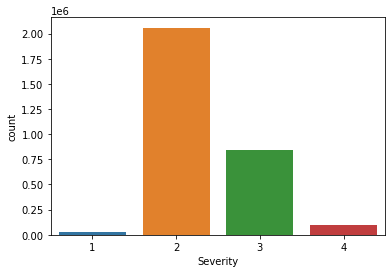

In [14]:
sns.countplot(df['Severity']) 

In [15]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
td='durationt'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df[['durationt']].head()

,durationt
2,30.0
3,30.0
4,30.0
5,30.0
6,30.0


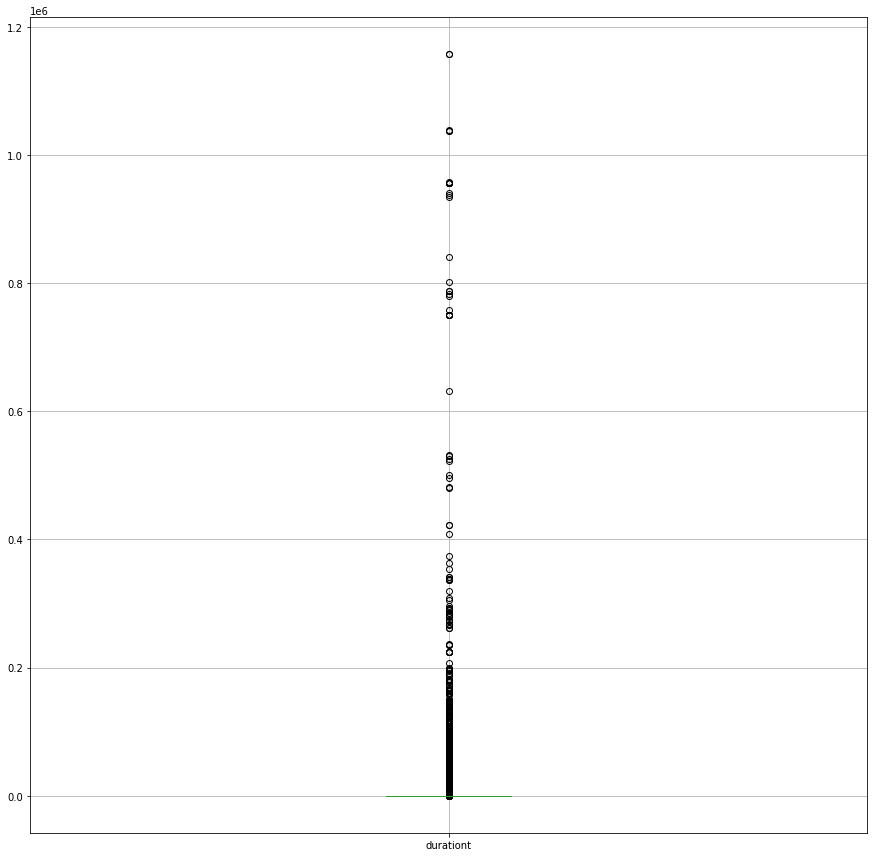

In [16]:
boxplot = df[['durationt']].boxplot(figsize= (15,15))

In [17]:
df[['durationt']].describe()

,durationt
count,3.027864e+06
mean,1.141076e+02
std,3.235723e+03
min,-3.400000e+01
25%,3.000000e+01
50%,4.500000e+01
75%,7.600000e+01
max,1.157083e+06


In [18]:
# Obteniendo indices de filas para valores negativos
indices =df.query('durationt < 0').index 
indices.shape

(11,)

In [19]:
# Obteniendo indices de filas para valores mayores a un dia
df.query('durationt > 1440').index.shape

(1984,)

In [20]:
1984/3513617

0.0005646602916595634

In [21]:
df.drop(indices, inplace=True)

In [22]:
# Creando nueva categoria de datos basada en los cuartiles de la duracion
criteria = [(df['durationt'] >= 0) & (df['durationt'] < 30),
(df['durationt'] >= 30) & (df['durationt'] < 45),
(df['durationt'] >= 45) & (df['durationt'] < 60),
(df['durationt'] >= 60)]
values = [1, 2, 3, 4]
 
df['newSeverity'] = np.select(criteria, values, 0)

C:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newSeverity', ylabel='count'>

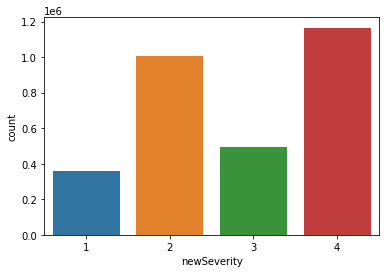

In [23]:
sns.countplot(df['newSeverity'])

In [24]:
df.shape

(3027853, 37)

In [25]:
df['newSeverity'].value_counts()

4    1165351
2    1006664
3     494148
1     361690
Name: newSeverity, dtype: int64

In [26]:
df['newDate'] = pd.to_datetime(df['Start_Time'])
df['month'] = df['newDate'].dt.month
df['dayOfWeek'] = df['newDate'].dt.dayofweek
df['Hour'] = df['newDate'].dt.hour

C:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='count'>

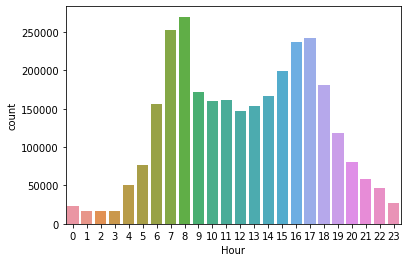

In [27]:
sns.countplot(df['Hour'])

C:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

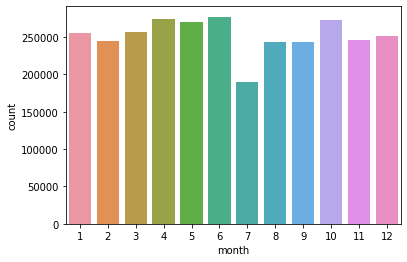

In [28]:
sns.countplot(df['month'])

C:\Users\USER\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dayOfWeek', ylabel='count'>

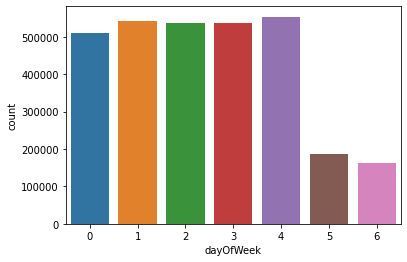

In [29]:
sns.countplot(df['dayOfWeek'])

In [30]:
df = df.drop(['newDate'], axis=1)

In [31]:
df.shape

(3027853, 40)

In [32]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'durationt', 'newSeverity', 'month',
       'dayOfWeek', 'Hour'],
      dtype='object')

In [33]:
# Top 10 de las duraciones de accidente mas altas
df[['Start_Time', 'End_Time','City','Description','durationt']].sort_values(by=['durationt'],ascending=False).head(10)

,Start_Time,End_Time,City,Description,durationt
2740837,2018-02-16 12:39:19,2020-04-30 01:22:43,Claysville,At Reed Rd - Fuel spillage accident.,1157083.0
2740845,2018-02-16 12:39:19,2020-04-30 01:22:43,Claysville,At N Sunset Beach Rd - Fuel spillage accident.,1157083.0
2586086,2016-05-05 14:47:55,2018-04-27 16:00:00,Newark,Closed between Roanoke Ave and US-1-9-TRUCK/To...,1039752.0
2740850,2018-05-10 09:17:18,2020-04-30 01:22:43,Claysville,At Grimes Rd - Fuel spillage accident.,1037765.0
2740840,2018-05-10 09:17:18,2020-04-30 01:22:43,Claysville,At Lake Rd - Fuel spillage accident.,1037765.0
2571905,2016-07-01 12:51:02,2018-04-27 16:00:00,Newark,Closed between Roanoke Ave and US-1-9-TRUCK/To...,957789.0
3380860,2017-02-04 07:00:00,2018-11-30 19:00:00,Detroit,Closed between Livernois Ave/Exit 46 and Allen...,956880.0
2643270,2017-02-04 07:00:00,2018-11-30 19:00:00,Detroit,Closed between Livernois Ave/Exit 46 and North...,956880.0
3320342,2017-02-04 07:00:00,2018-11-30 19:00:00,Detroit,Closed between Livernois Ave/Exit 46 and Allen...,956880.0
3382352,2017-02-04 07:00:00,2018-11-30 19:00:00,Detroit,Closed between Livernois Ave/Exit 46 and Allen...,956880.0


In [34]:
df['Weather_Condition'].value_counts().head(15)

Clear               614958
Fair                538439
Mostly Cloudy       447118
Overcast            321547
Partly Cloudy       314808
Cloudy              210325
Scattered Clouds    176040
Light Rain          163975
Light Snow           47118
Rain                 38524
Haze                 29740
Fog                  24985
Heavy Rain           14390
Light Drizzle        11267
Fair / Windy          7882
Name: Weather_Condition, dtype: int64

In [35]:
# Listado de variables a eliminar, se eliminaran variables a posteriori
dropColumns =  ['Start_Time', 'End_Time','durationt','Description','Distance(mi)']
# Columnas numericas a ser escaladas
numDataCol = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']
len(dropColumns)
descripcion = df['Description'].reset_index(drop=True)

In [36]:
def preparandoDatos(df, dropColumns, numDataCol):
    df=df.drop(dropColumns, axis=1)
    data = df.copy()
    mapping = {}
    
    for col in data.columns:
        if (data[col].dtype == "object" or data[col].dtype == "bool"):
            le = LabelEncoder()
            data[col].fillna("None", inplace=True)
            le.fit(list(data[col].astype(str).values))
            data[col] = le.transform(list(data[col].astype(str).values))
            mapping.update({col: dict(zip(le.classes_, range(len(le.classes_))))})
        else:
            data[col].fillna(-999, inplace=True)
            
    archivo = 'DiccionarioDeCategorias.pkl'
    rutaArchivo = path + archivo        
    a_file = open(rutaArchivo, "wb")
    pickle.dump(mapping, a_file)
    a_file.close()
    
    colDescriptoras = data.columns
    
    scaler = StandardScaler().fit(data[numDataCol])
    numDataScaled = scaler.transform(data[numDataCol])

    otherDataDF = data[data.columns.difference(numDataCol)].reset_index(drop=True)
    numDataDF = pd.DataFrame(data = numDataScaled, columns = numDataCol).reset_index(drop=True)
    # pd.concat([otherDataDF,numDataDF])
    return pd.concat([otherDataDF,numDataDF], join="outer",axis=1), mapping

In [37]:
%%time
df, diccionario = preparandoDatos(df, dropColumns, numDataCol) 

Wall time: 1min 45s


In [38]:
def busquedaDict(categoria, valor):
    print([k for k,v in diccionario[categoria].items() if v == valor])

In [39]:
busquedaDict('City',4)

['Abbottstown']


In [40]:
# concatenating the DataFrames 
df = pd.concat([df,descripcion], join="outer",axis=1)

In [41]:
df.columns

Index(['Amenity', 'Astronomical_Twilight', 'Bump', 'City', 'Civil_Twilight',
       'County', 'Crossing', 'Give_Way', 'Hour', 'Junction',
       'Nautical_Twilight', 'No_Exit', 'Railway', 'Roundabout', 'Severity',
       'Start_Lat', 'Start_Lng', 'State', 'Station', 'Stop', 'Street',
       'Sunrise_Sunset', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Weather_Condition', 'Wind_Direction', 'dayOfWeek', 'month',
       'newSeverity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Description'],
      dtype='object')

In [42]:
df.shape

(3027853, 36)

In [43]:
archivo = 'cleanedVariables-standarized.pkl'
rutaArchivo = path + archivo    
df.to_pickle(rutaArchivo)

In [44]:
df.head()

,Amenity,Astronomical_Twilight,Bump,City,Civil_Twilight,County,Crossing,Give_Way,Hour,Junction,...,Wind_Direction,dayOfWeek,month,newSeverity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Description
0,0,0,0,11194,1,317,0,0,6,0,...,15,0,2,2,-1.413528,1.584296,-0.040193,0.298707,-0.899846,Accident on OH-32 State Route 32 Westbound at ...
1,0,0,0,2467,0,1037,0,0,7,0,...,15,0,2,2,-1.461671,1.407576,-0.074852,-0.056635,-0.690152,Accident on I-75 Southbound at Exits 52 52B US...
2,0,0,0,2467,0,1037,0,0,7,0,...,15,0,2,2,-1.413528,1.098315,-0.063299,-1.122663,-0.899846,Accident on McEwen Rd at OH-725 Miamisburg Cen...
3,0,0,0,11058,0,545,0,0,7,0,...,14,0,2,2,-1.311892,1.451756,-0.086405,-0.767321,-0.899846,Accident on I-270 Outerbelt Northbound near Ex...
4,0,0,0,2467,0,1037,0,0,7,0,...,21,0,2,2,-1.520513,1.584296,-0.051746,-0.767321,-0.899846,Accident on Oakridge Dr at Woodward Ave. Expec...
